In [ ]:
from IPython.core.debugger import set_trace

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
plt.style.use(style="seaborn")



<ipython-input-2-a4b84277eb79>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style="seaborn")


In [ ]:
df=pd.read_csv("NIFTY BANK_Historical_PR_07012024to07082024.csv")

In [ ]:
df.head(5)


,Index Name,Date,Open,High,Low,Close
0,NIFTY BANK,06 Aug 2024,50436.90,50688.80,49659.05,49748.30
1,NIFTY BANK,05 Aug 2024,50586.25,50747.55,49719.10,50092.10
2,NIFTY BANK,02 Aug 2024,51172.25,51608.70,51087.85,51350.15
3,NIFTY BANK,01 Aug 2024,51672.60,51877.15,51456.20,51564.00
4,NIFTY BANK,31 Jul 2024,51583.45,51663.10,51335.70,51553.40


In [ ]:
df=df[["Close"]].copy()

In [ ]:
df.describe()

,Open,High,Low,Close
count,144.000000,144.000000,144.000000,144.000000
mean,48565.307292,48888.961458,48210.881944,48552.965972
std,2276.216578,2252.112210,2271.611980,2270.224214
min,44489.400000,45139.050000,44429.000000,44866.150000
25%,46667.000000,47193.750000,46525.175000,46850.750000
50%,48046.650000,48247.125000,47731.500000,47999.075000
75%,50254.987500,50588.375000,49702.787500,49921.825000
max,53357.700000,53357.700000,52815.900000,53103.700000


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

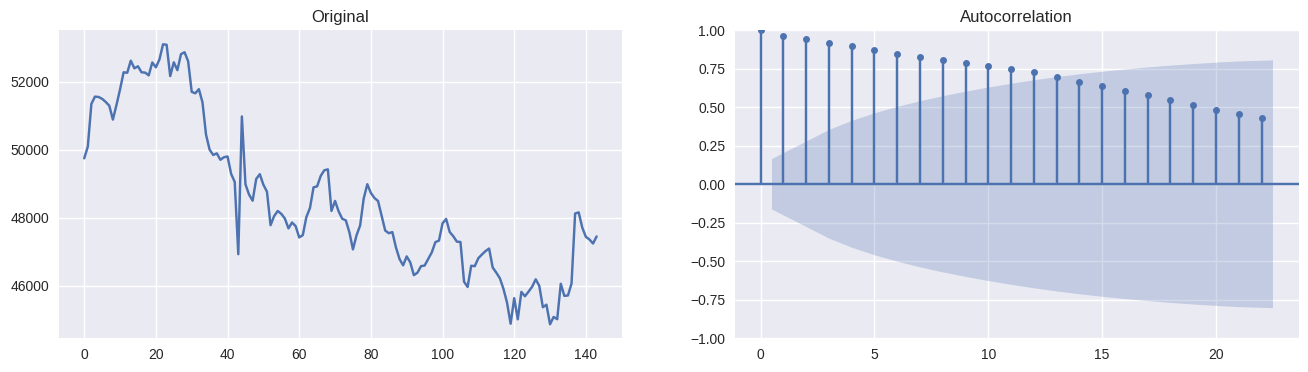

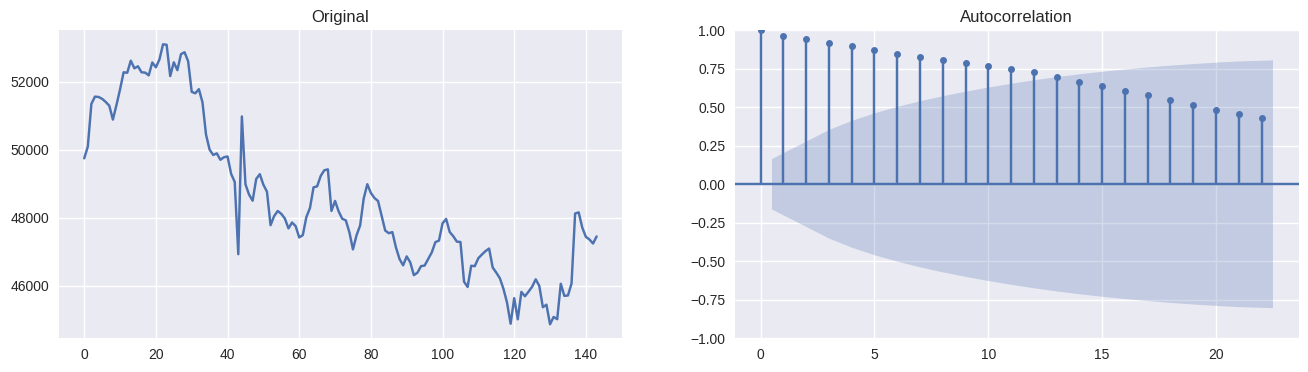

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close,ax=ax2)

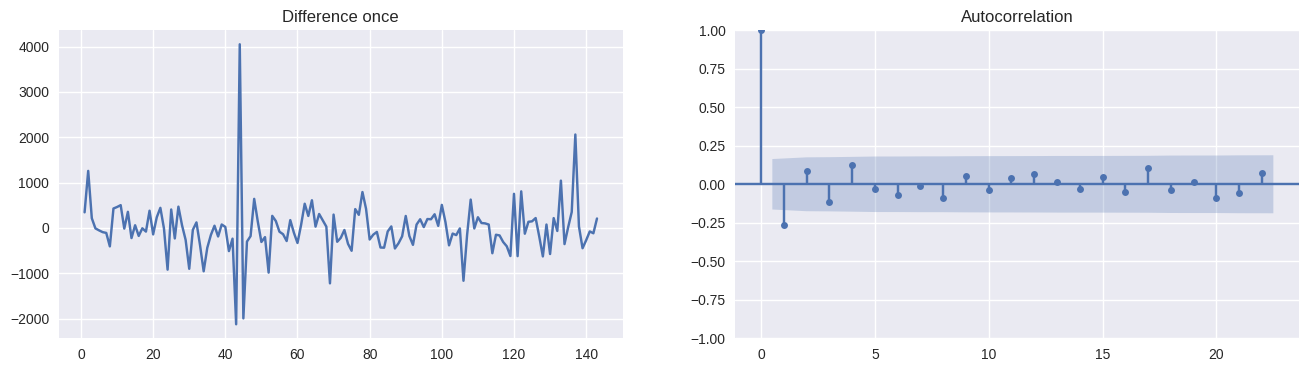

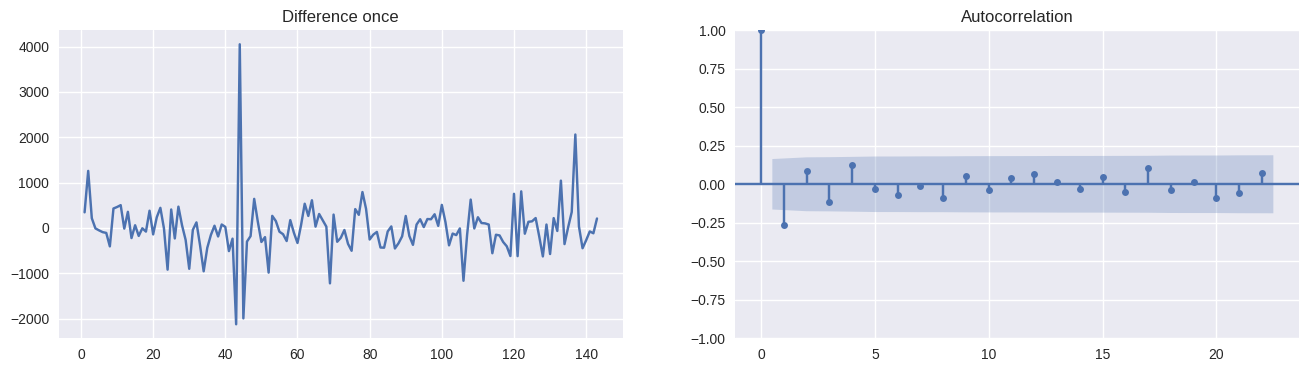

In [ ]:
diff = df.Close.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2)

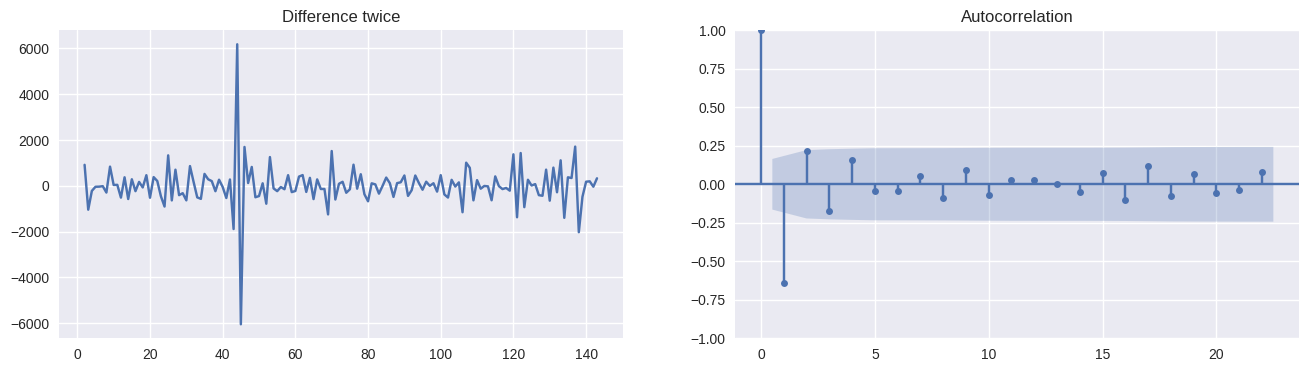

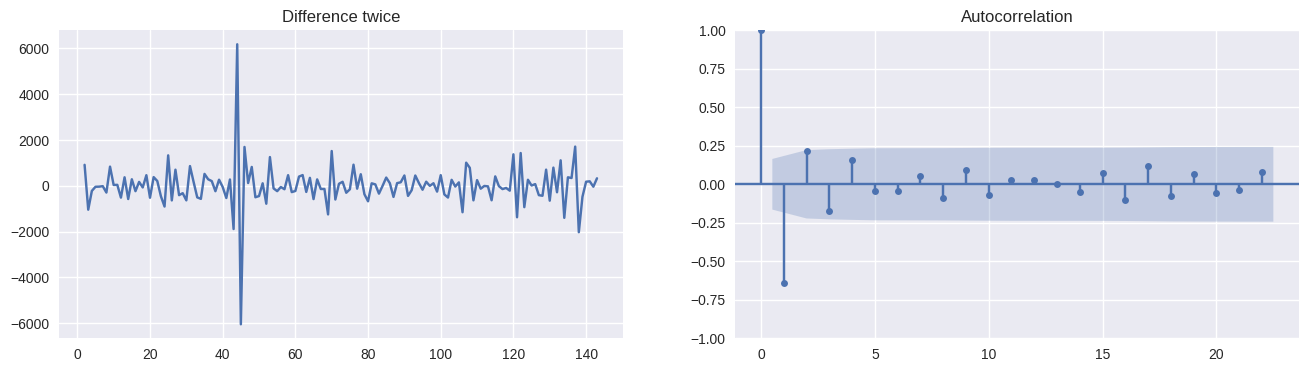

In [ ]:
diff = df.Close.diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2)

In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.9 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(df.Close, test='adf')

1

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

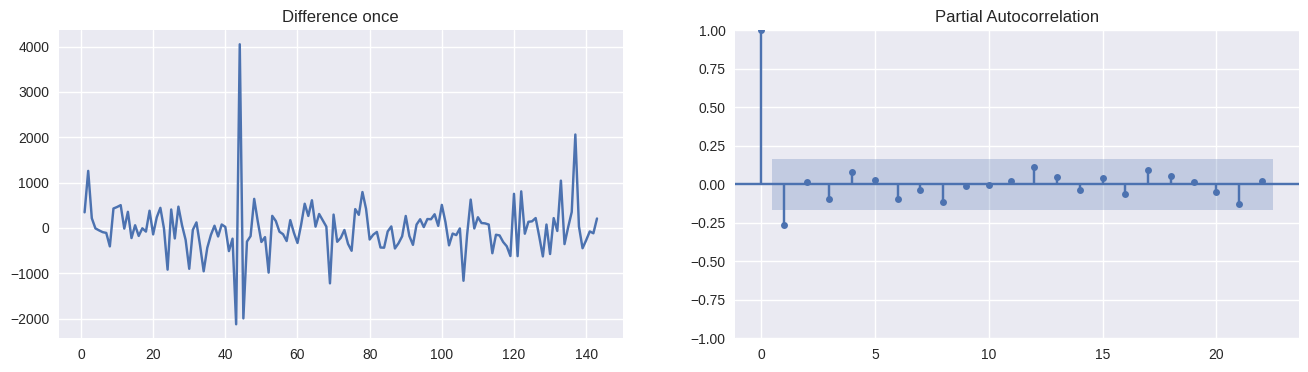

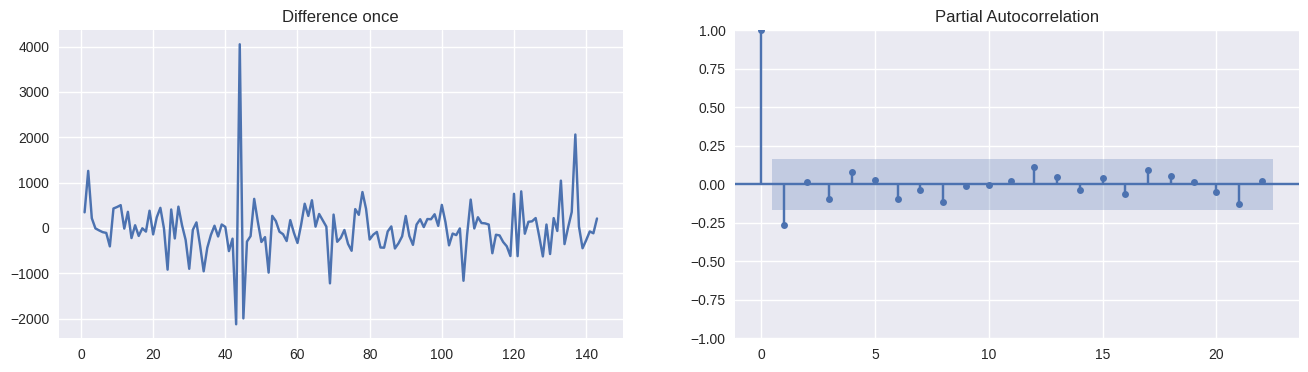

In [ ]:
diff = df.Close.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2)

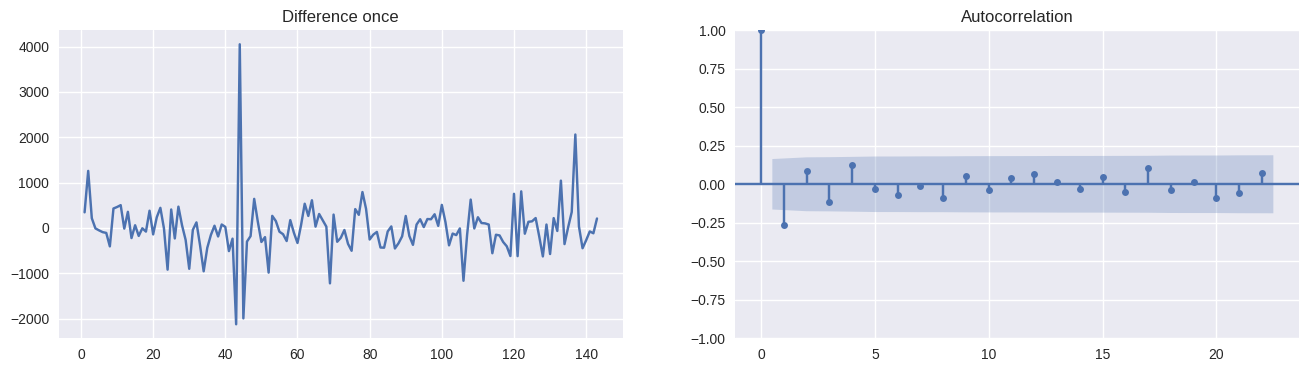

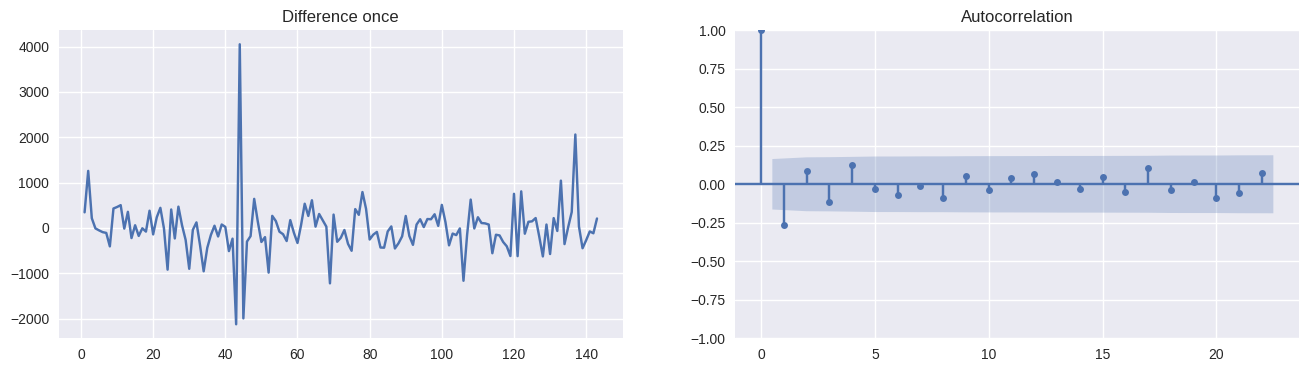

In [ ]:
diff = df.Close.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.Close, order=(6, 1, 3))
result = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  144
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -1111.211
Date:                Wed, 18 Sep 2024   AIC                           2242.422
Time:                        15:27:07   BIC                           2272.050
Sample:                             0   HQIC                          2254.461
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4511      0.191      2.357      0.018       0.076       0.826
ar.L2          0.5075      0.304      1.669      0.095      -0.089       1.104
ar.L3         -0.9176      0.190     -4.834      0.0

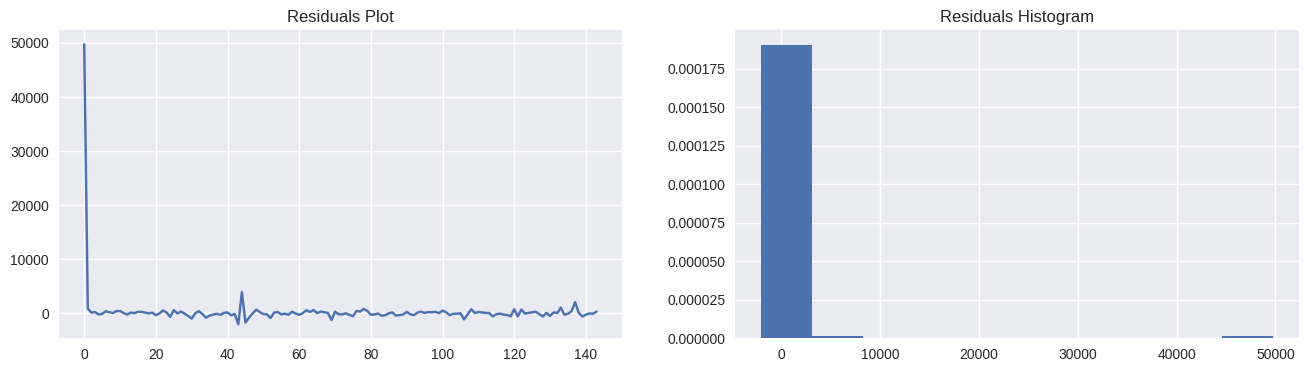

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'result.resid' is already computed
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot the residuals
ax1.plot(residuals)
ax1.set_title('Residuals Plot')

# Plot the histogram of residuals
ax2.hist(residuals, density=True)
ax2.set_title('Residuals Histogram')

plt.show()


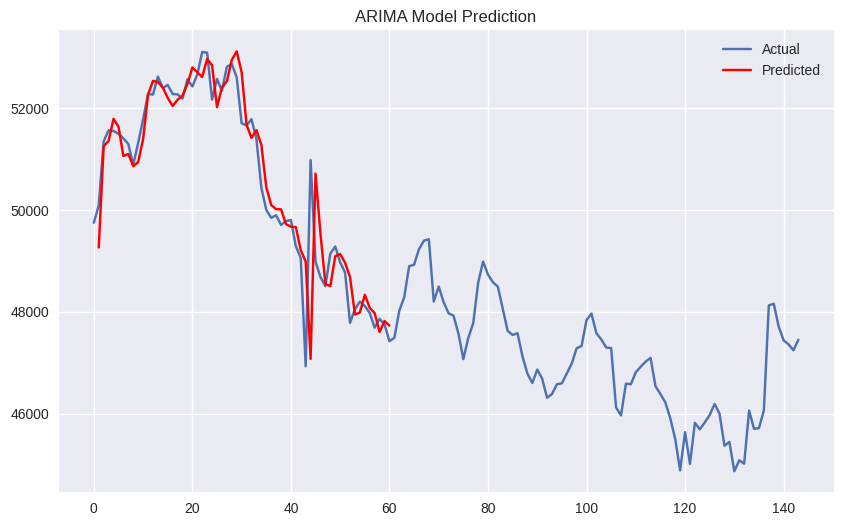

In [ ]:
# Plotting the predictions using the ARIMA model
# Import necessary libraries
import matplotlib.pyplot as plt

# Use predict method to get predictions
predictions = result.predict(start=1, end=60, dynamic=False)

# Plot the actual data and predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.Close, label='Actual')  # Replace 'df.index' and 'df.Close' with your data
plt.plot(df.index[1:61], predictions, label='Predicted', color='red')  # Adjust index range as per data
plt.legend(loc='best')
plt.title('ARIMA Model Prediction')
plt.show()
